## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras



Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=10, num_neurons=[256, 256, 256]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

reduce_lr_factor = [0.9, 0.5, 0.1]
redice_lr_patient = [3,5,10]

In [11]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = reduce_lr = ReduceLROnPlateau(factor=0.5, 
                              min_lr=1e-12, 
                              monitor='val_loss', 
                              patience=5, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("optimizer: %s,reduce_factor: %.2f, reduce_patient: %i" % (str(optim), reduce_factor, reduce_patient))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.90, reduce_patient: 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
batch_normalization_82 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalization_83 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
batch_normalizatio

50000/50000 [==============================] - 5s 101us/step - loss: 2.3906 - acc: 0.2295 - val_loss: 2.2150 - val_acc: 0.2866
Epoch 2/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.8900 - acc: 0.3538 - val_loss: 1.9474 - val_acc: 0.3502
Epoch 3/25
50000/50000 [==============================] - 2s 34us/step - loss: 1.7443 - acc: 0.3963 - val_loss: 1.8216 - val_acc: 0.3760
Epoch 4/25
50000/50000 [==============================] - 2s 34us/step - loss: 1.6668 - acc: 0.4183 - val_loss: 1.7386 - val_acc: 0.4024
Epoch 5/25
50000/50000 [==============================] - 2s 34us/step - loss: 1.6107 - acc: 0.4389 - val_loss: 1.6867 - val_acc: 0.4138
Epoch 6/25
50000/50000 [==============================] - 2s 34us/step - loss: 1.5672 - acc: 0.4528 - val_loss: 1.6478 - val_acc: 0.4272
Epoch 7/25
50000/50000 [==============================] - 2s 34us/step - loss: 1.5330 - acc: 0.4647 - val_loss: 1.6296 - val_acc: 0.4309
Epoch 8/25
50000/50000 [===========================

Epoch 12/25
50000/50000 [==============================] - 2s 34us/step - loss: 1.4047 - acc: 0.5078 - val_loss: 1.5556 - val_acc: 0.4531
Epoch 13/25
50000/50000 [==============================] - 2s 34us/step - loss: 1.3855 - acc: 0.5166 - val_loss: 1.5467 - val_acc: 0.4566
Epoch 14/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.3683 - acc: 0.5214 - val_loss: 1.5266 - val_acc: 0.4636
Epoch 15/25
50000/50000 [==============================] - 2s 34us/step - loss: 1.3510 - acc: 0.5279 - val_loss: 1.5229 - val_acc: 0.4638
Epoch 16/25
50000/50000 [==============================] - 2s 34us/step - loss: 1.3341 - acc: 0.5358 - val_loss: 1.5154 - val_acc: 0.4654
Epoch 17/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.3194 - acc: 0.5405 - val_loss: 1.5115 - val_acc: 0.4668
Epoch 18/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.3049 - acc: 0.5445 - val_loss: 1.5055 - val_acc: 0.4673
Epoch 19/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 112us/step - loss: 2.4326 - acc: 0.2260 - val_loss: 2.3582 - val_acc: 0.2660
Epoch 2/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.8978 - acc: 0.3465 - val_loss: 1.9422 - val_acc: 0.3428
Epoch 3/25
50000/50000 [==============================] - 2s 34us/step - loss: 1.7511 - acc: 0.3891 - val_loss: 1.8166 - val_acc: 0.3745
Epoch 4/25
50000/50000 [==============================] - 2s 34us/step - loss: 1.6716 - acc: 0.4157 - val_loss: 1.7536 - val_acc: 0.3926
Epoch 5/25
50000/50000 [==============================] - 2s 34us/step - loss: 1.6158 - acc: 0.4326 - val_loss: 1.7096 - val_acc: 0.4055
Epoch 6/25
50000/50000 [==============================] - 2s 34us/step - loss: 1.5715 - acc: 0.4500 - val_loss: 1.6764 - val_acc: 0.4176
Epoch 7/25
50000/50000 [==============================] - 2s 34us/step - loss: 1.5342 - acc: 0.4633 - val_loss: 1.6480 - val_ac

50000/50000 [==============================] - 2s 35us/step - loss: 1.2603 - acc: 0.5640 - val_loss: 1.5056 - val_acc: 0.4736
Epoch 12/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.2396 - acc: 0.5711 - val_loss: 1.4840 - val_acc: 0.4805
Epoch 13/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.2228 - acc: 0.5778 - val_loss: 1.4819 - val_acc: 0.4814
Epoch 14/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.2054 - acc: 0.5837 - val_loss: 1.4687 - val_acc: 0.4856
Epoch 15/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.1883 - acc: 0.5887 - val_loss: 1.4629 - val_acc: 0.4839
Epoch 16/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.1739 - acc: 0.5952 - val_loss: 1.4721 - val_acc: 0.4844
Epoch 17/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.1580 - acc: 0.6025 - val_loss: 1.4523 - val_acc: 0.4895
Epoch 18/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 6s 129us/step - loss: 2.1330 - acc: 0.2935 - val_loss: 1.9696 - val_acc: 0.3285
Epoch 2/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.7392 - acc: 0.3943 - val_loss: 1.8022 - val_acc: 0.3767
Epoch 3/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.6416 - acc: 0.4286 - val_loss: 1.7065 - val_acc: 0.4041
Epoch 4/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.5847 - acc: 0.4467 - val_loss: 1.6709 - val_acc: 0.4190
Epoch 5/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.5427 - acc: 0.4616 - val_loss: 1.6368 - val_acc: 0.4291
Epoch 6/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.5093 - acc: 0.4742 - val_loss: 1.6119 - val_acc: 0.4346
Epoch 7/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.4817 - acc: 0.4812 - val_loss: 1.6063 - val_ac

Epoch 12/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.3923 - acc: 0.5156 - val_loss: 1.5705 - val_acc: 0.4514
Epoch 13/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.3769 - acc: 0.5215 - val_loss: 1.5606 - val_acc: 0.4541
Epoch 14/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.3619 - acc: 0.5265 - val_loss: 1.5618 - val_acc: 0.4495
Epoch 15/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.3485 - acc: 0.5323 - val_loss: 1.5499 - val_acc: 0.4548
Epoch 16/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.3356 - acc: 0.5360 - val_loss: 1.5407 - val_acc: 0.4605
Epoch 17/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.3242 - acc: 0.5394 - val_loss: 1.5425 - val_acc: 0.4599
Epoch 18/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.3116 - acc: 0.5445 - val_loss: 1.5353 - val_acc: 0.4621
Epoch 19/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 7s 144us/step - loss: 2.2971 - acc: 0.2380 - val_loss: 2.1570 - val_acc: 0.2899
Epoch 2/25
50000/50000 [==============================] - 2s 37us/step - loss: 1.9365 - acc: 0.3336 - val_loss: 1.9577 - val_acc: 0.3316
Epoch 3/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.7994 - acc: 0.3723 - val_loss: 1.8515 - val_acc: 0.3655
Epoch 4/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.7137 - acc: 0.4000 - val_loss: 1.7896 - val_acc: 0.3779
Epoch 5/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.6521 - acc: 0.4217 - val_loss: 1.7427 - val_acc: 0.3916
Epoch 6/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.6020 - acc: 0.4383 - val_loss: 1.7093 - val_acc: 0.4020
Epoch 7/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.5611 - acc: 0.4523 - val_loss: 1.6558 - val_ac

Epoch 12/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.4079 - acc: 0.5115 - val_loss: 1.5910 - val_acc: 0.4454
Epoch 13/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.3863 - acc: 0.5175 - val_loss: 1.5732 - val_acc: 0.4455
Epoch 14/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.3663 - acc: 0.5255 - val_loss: 1.5794 - val_acc: 0.4440
Epoch 15/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.3463 - acc: 0.5325 - val_loss: 1.5509 - val_acc: 0.4531
Epoch 16/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.3280 - acc: 0.5387 - val_loss: 1.5449 - val_acc: 0.4568
Epoch 17/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.3099 - acc: 0.5479 - val_loss: 1.5480 - val_acc: 0.4589
Epoch 18/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.2932 - acc: 0.5536 - val_loss: 1.5384 - val_acc: 0.4577
Epoch 19/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 8s 159us/step - loss: 2.2730 - acc: 0.2481 - val_loss: 2.1442 - val_acc: 0.2856
Epoch 2/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.9356 - acc: 0.3386 - val_loss: 1.9890 - val_acc: 0.3246
Epoch 3/25
50000/50000 [==============================] - 2s 35us/step - loss: 1.8041 - acc: 0.3778 - val_loss: 1.8646 - val_acc: 0.3547
Epoch 4/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.7187 - acc: 0.4028 - val_loss: 1.7849 - val_acc: 0.3877
Epoch 5/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.6574 - acc: 0.4249 - val_loss: 1.7517 - val_acc: 0.3908
Epoch 6/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.6075 - acc: 0.4405 - val_loss: 1.7078 - val_acc: 0.4039
Epoch 7/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.5652 - acc: 0.4530 - val_loss: 1.6776 - val_ac

50000/50000 [==============================] - 2s 36us/step - loss: 1.4294 - acc: 0.5003 - val_loss: 1.5758 - val_acc: 0.4487
Epoch 12/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.4055 - acc: 0.5090 - val_loss: 1.5638 - val_acc: 0.4514
Epoch 13/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.3823 - acc: 0.5179 - val_loss: 1.5613 - val_acc: 0.4534
Epoch 14/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.3618 - acc: 0.5262 - val_loss: 1.5692 - val_acc: 0.4483
Epoch 15/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.3432 - acc: 0.5333 - val_loss: 1.5415 - val_acc: 0.4571
Epoch 16/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.3244 - acc: 0.5386 - val_loss: 1.5439 - val_acc: 0.4611
Epoch 17/25
50000/50000 [==============================] - 2s 36us/step - loss: 1.3067 - acc: 0.5452 - val_loss: 1.5308 - val_acc: 0.4603
Epoch 18/25
50000/50000 [=====================

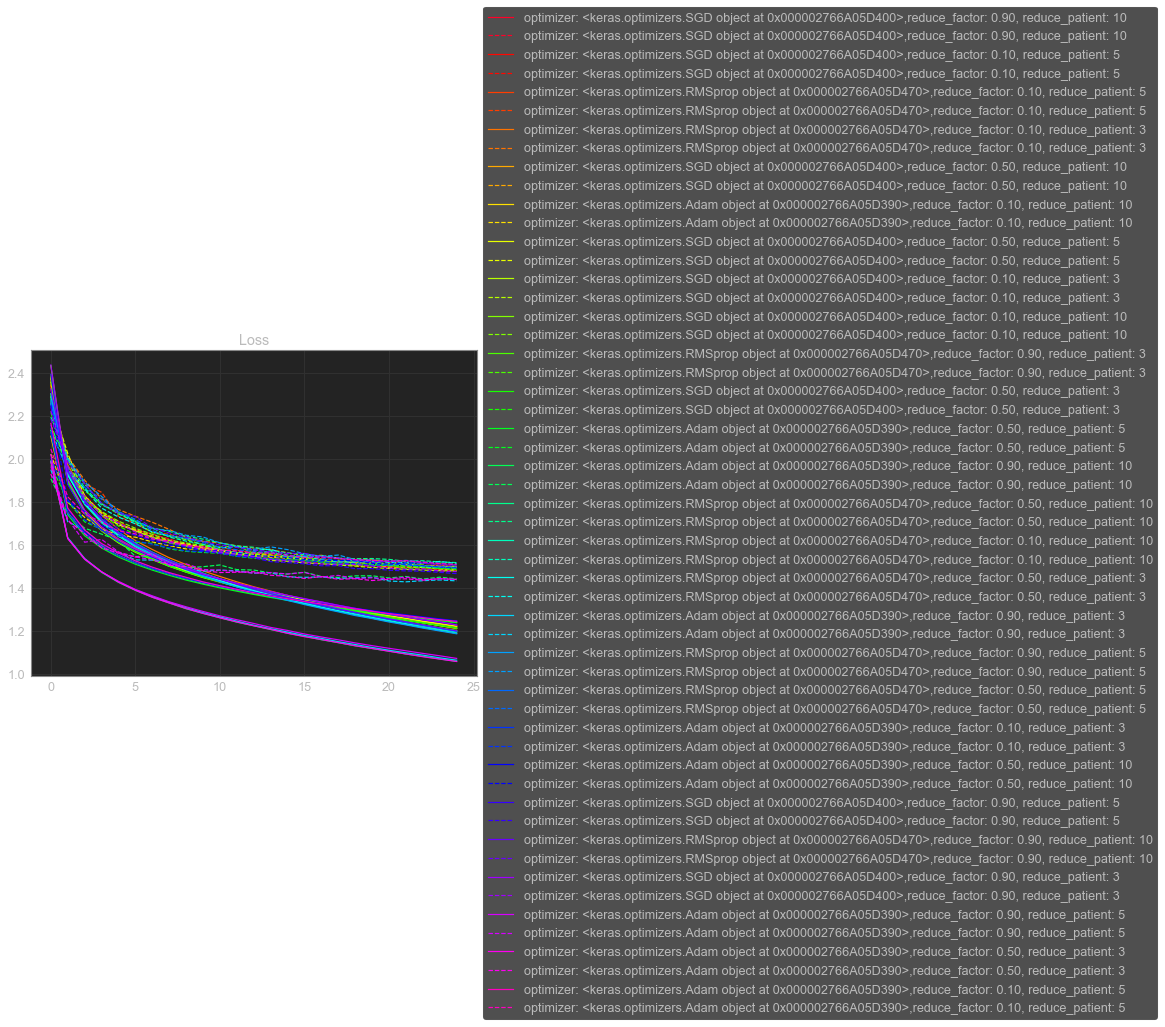

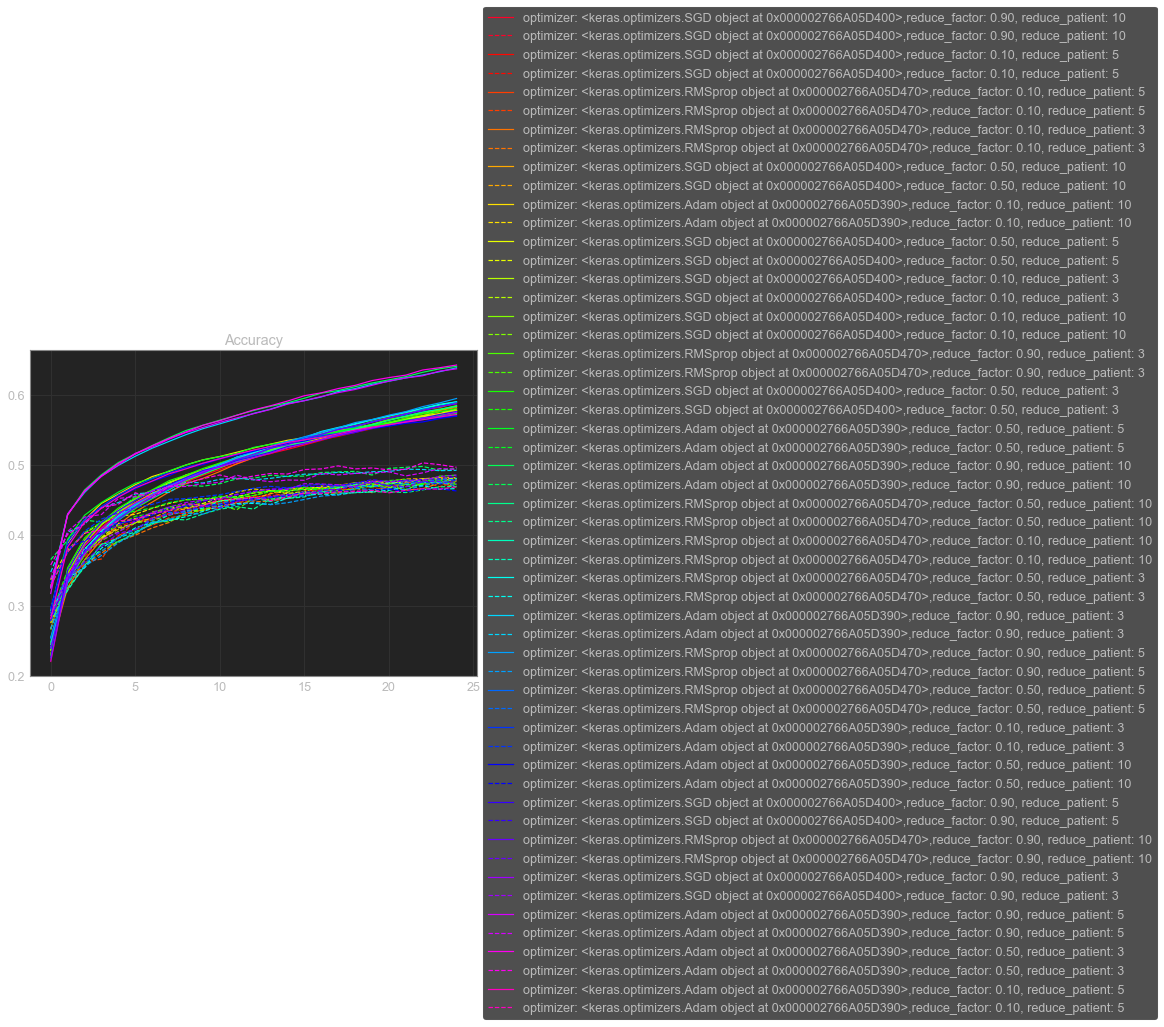

In [12]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
fig.savefig("SBO_TRUE_loss.png", bbox_inches='tight', dpi=300)


fig = plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()
fig.savefig("SBO_TRUE_acc.png", bbox_inches='tight', dpi=300)
